In [11]:
!pip install np_utils

In [12]:
!pip install keras

In [13]:
!pip install tensorflow


In [35]:
!pip install scikit-learn==0.24 --user

In [37]:
!pip install scikit-learn

In [43]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import KFold # use for cross validation
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import mean_absolute_error

## for Deep-learing:
import tensorflow.keras as k
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD 
from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.utils import np_utils
# from keras.utils.np_utils import to_categorical
import itertools
from tensorflow.keras.layers import LSTM
# from tensorflow.keras.layers.convolutional import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dropout

In [2]:
df = pd.read_csv("household_power_consumption.txt",sep = ';',
                parse_dates={'dt':['Date','Time']},
                infer_datetime_format=True,
                low_memory=False, na_values=['nan','?'],
                index_col='dt')

In [3]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [4]:
df.size

14526813

In [5]:
df.iloc[:,0]

dt
2006-12-16 17:24:00    4.216
2006-12-16 17:25:00    5.360
2006-12-16 17:26:00    5.374
2006-12-16 17:27:00    5.388
2006-12-16 17:28:00    3.666
                       ...  
2010-11-26 20:58:00    0.946
2010-11-26 20:59:00    0.944
2010-11-26 21:00:00    0.938
2010-11-26 21:01:00    0.934
2010-11-26 21:02:00    0.932
Name: Global_active_power, Length: 2075259, dtype: float64

In [6]:
droping_list_all=[]
for j in range(0, 7):
    if not df.iloc[:, j].notnull().all():
        droping_list_all.append(j)
droping_list_all

[0, 1, 2, 3, 4, 5, 6]

In [7]:
for j in range(0,7):
    df.iloc[:,j]=df.iloc[:,j].fillna(df.iloc[:,j].mean())

In [8]:
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [9]:
amb=list()
amb.append(df.shift(1))

In [10]:
amb

[                     Global_active_power  Global_reactive_power  Voltage  \
 dt                                                                         
 2006-12-16 17:24:00                  NaN                    NaN      NaN   
 2006-12-16 17:25:00                4.216                  0.418   234.84   
 2006-12-16 17:26:00                5.360                  0.436   233.63   
 2006-12-16 17:27:00                5.374                  0.498   233.29   
 2006-12-16 17:28:00                5.388                  0.502   233.74   
 ...                                  ...                    ...      ...   
 2010-11-26 20:58:00                0.946                  0.000   240.33   
 2010-11-26 20:59:00                0.946                  0.000   240.43   
 2010-11-26 21:00:00                0.944                  0.000   240.00   
 2010-11-26 21:01:00                0.938                  0.000   239.82   
 2010-11-26 21:02:00                0.934                  0.000   239.70   

In [11]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(-i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    for i in range(0, n_out):
        cols.append(dff.shift(-i))
        if i==0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1)) for j in range(n_vars)]
        
        agg = pd.concat(cols, axis=1)
        agg.columns = names
        if dropnan:
            agg.dropna(inplace=True)
        return agg
    
'''polymorphism--the function definition would change  to the leatest one'''
    
    
from pandas import DataFrame
from pandas import concat

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
    data: Sequence of observations as a list or NumPy array.
    n_in: Number of lag observations as input (X).
    n_out: Number of observations as output (y).
    dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
    Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    ''' input sequence (t-n, ... t-1)'''
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    ''' forecast sequence (t, t+1, ... t+n)'''
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [12]:
df_resample = df.resample('h').mean()
df_resample.shape

(34589, 7)

In [13]:
df_resample

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.0,0.527778,16.861111
2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.0,6.716667,16.866667
2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.0,1.433333,16.683333
2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.0,0.000000,16.783333
2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.0,0.416667,17.216667
...,...,...,...,...,...,...,...
2010-11-26 17:00:00,1.725900,0.061400,237.069667,7.216667,0.0,0.000000,12.866667
2010-11-26 18:00:00,1.573467,0.053700,237.531833,6.620000,0.0,0.000000,0.000000
2010-11-26 19:00:00,1.659333,0.060033,236.741000,7.056667,0.0,0.066667,0.000000


In [44]:
values = df_resample.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, 1, 1)
reframed.drop(reframed.columns[[8,9,10,11,12,13]], axis=1, inplace=True)
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var1(t)
1,0.636816,0.295738,0.337945,0.631157,0.0,0.011366,0.782418,0.545045
2,0.545045,0.103358,0.335501,0.541487,0.0,0.144652,0.782676,0.509006
3,0.509006,0.110073,0.283802,0.502152,0.0,0.030869,0.774169,0.488550
4,0.488550,0.096987,0.315987,0.481110,0.0,0.000000,0.778809,0.455597
5,0.455597,0.099010,0.434417,0.449904,0.0,0.008973,0.798917,0.322555


In [45]:
values = reframed.values
n_train_time = 365*24
train = values[:n_train_time, :]
test = values[n_train_time:, :]
train_x, train_y = train[:, :-1], train[:, -1]
test_x, test_y = test[:, :-1], test[:, -1]
train_x = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_x = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))

In [16]:
test_y

array([0.38881696, 0.42106517, 0.5660138 , ..., 0.2385342 , 0.16153105,
       0.12594772])

In [17]:
train_x.shape

(8760, 1, 7)

In [18]:
train_x

array([[[0.63681623, 0.29573827, 0.33794529, ..., 0.        ,
         0.01136636, 0.78241815]],

       [[0.54504495, 0.10335773, 0.33550078, ..., 0.        ,
         0.14465183, 0.78267595]],

       [[0.50900588, 0.11007318, 0.28380167, ..., 0.        ,
         0.03086863, 0.7741686 ]],

       ...,

       [[0.36401583, 0.1242359 , 0.69805952, ..., 0.00206754,
         0.01758794, 0.84764114]],

       [[0.36006442, 0.12165303, 0.72841661, ..., 0.28807719,
         0.00717875, 0.85305491]],

       [[0.23474334, 0.05923375, 0.69520156, ..., 0.        ,
         0.        , 0.84686775]]])

In [19]:
train_y.shape

(8760,)

In [20]:
test_x.shape

(25828, 1, 7)

Epoch 1/50
126/126 - 5s - loss: 0.0196 - val_loss: 0.0116
Epoch 2/50
126/126 - 1s - loss: 0.0123 - val_loss: 0.0102
Epoch 3/50
126/126 - 1s - loss: 0.0112 - val_loss: 0.0095
Epoch 4/50
126/126 - 1s - loss: 0.0106 - val_loss: 0.0093
Epoch 5/50
126/126 - 1s - loss: 0.0106 - val_loss: 0.0093
Epoch 6/50
126/126 - 1s - loss: 0.0105 - val_loss: 0.0093
Epoch 7/50
126/126 - 1s - loss: 0.0104 - val_loss: 0.0095
Epoch 8/50
126/126 - 1s - loss: 0.0105 - val_loss: 0.0095
Epoch 9/50
126/126 - 1s - loss: 0.0104 - val_loss: 0.0094
Epoch 10/50
126/126 - 1s - loss: 0.0105 - val_loss: 0.0094
Epoch 11/50
126/126 - 1s - loss: 0.0104 - val_loss: 0.0094
Epoch 12/50
126/126 - 1s - loss: 0.0104 - val_loss: 0.0096
Epoch 13/50
126/126 - 1s - loss: 0.0104 - val_loss: 0.0094
Epoch 14/50
126/126 - 1s - loss: 0.0104 - val_loss: 0.0095
Epoch 15/50
126/126 - 1s - loss: 0.0103 - val_loss: 0.0095
Epoch 16/50
126/126 - 1s - loss: 0.0104 - val_loss: 0.0094
Epoch 17/50
126/126 - 1s - loss: 0.0104 - val_loss: 0.0094
Epoch 

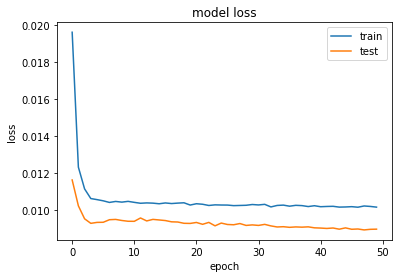

(25828, 7)
(25828,)
(25828, 7)
(25828,)
Test RMSE: 0.610
Test mad: 0.464


In [46]:
model = Sequential()
model.add(LSTM(150, input_shape=(train_x.shape[1], train_x.shape[2])))
model.add(Dropout(0.2))
#model.add(LSTM(70))
#model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')



# fit network
history = model.fit(train_x, train_y, epochs=50, batch_size=70, validation_data=(test_x, test_y), verbose=2, shuffle=False)

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# make a prediction
yhat = model.predict(test_x)
test_x = test_x.reshape((test_x.shape[0], 7))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_x[:, -6:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
print(inv_yhat.shape)
inv_yhat = inv_yhat[:,0]
print(inv_yhat.shape)
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_x[:, -6:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
print(inv_y.shape)
inv_y = inv_y[:,0]
print(inv_y.shape)
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
mad = mean_absolute_error(inv_y, inv_yhat)
print('Test RMSE: %.3f' % rmse)
print('Test mad: %.3f' % mad)


In [39]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

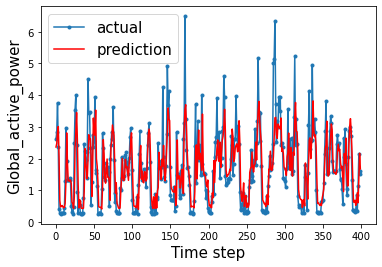

In [27]:
aa=[x for x in range(400)]
plt.plot(aa, inv_y[:400], marker='.', label="actual")
plt.plot(aa, inv_yhat[:400], 'r', label="prediction")
plt.ylabel('Global_active_power', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()